# Libraries

In [0]:
from sklearn import datasets
from sklearn import model_selection 
from sklearn import linear_model
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns #for graphics and figure styling


In [0]:
from google.colab import drive


In [78]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
cd "/content/drive/My Drive/AMS Project"

/content/drive/My Drive/AMS Project


In [0]:
lc_data = pd.read_csv("final_dataset.csv")

# Data Cleaning

In [81]:
lc_data.columns

Index(['ID', 'Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result',
       'BlackElo', 'BlackRatingDiff', 'ECO', 'Opening', 'Termination',
       'TimeControl', 'UTCDate', 'UTCTime', 'WhiteElo', 'WhiteRatingDiff',
       'total_moves', 'white_eval', 'black_eval', 'white_moves', 'black_moves',
       'early_game_eval', 'middle_game_eval', 'end_game_eval',
       'black_pawn_promote', 'black_king_castling', 'black_queen_castling',
       'black_capture', 'black_checks', 'white_pawn_promote',
       'white_king_castling', 'white_queen_castling', 'white_capture',
       'white_checks', 'white_time_remaining', 'black_time_remaining'],
      dtype='object')

In [0]:
lc1=lc_data.copy()
lc1=lc1.set_index("ID")

#dropping unnecessary columns
lc1=lc1.drop(['White', 'Black','Site', 'Date','Round','UTCDate','UTCTime','TimeControl'], axis=1)

In [83]:
lc1.columns

Index(['Event', 'Result', 'BlackElo', 'BlackRatingDiff', 'ECO', 'Opening',
       'Termination', 'WhiteElo', 'WhiteRatingDiff', 'total_moves',
       'white_eval', 'black_eval', 'white_moves', 'black_moves',
       'early_game_eval', 'middle_game_eval', 'end_game_eval',
       'black_pawn_promote', 'black_king_castling', 'black_queen_castling',
       'black_capture', 'black_checks', 'white_pawn_promote',
       'white_king_castling', 'white_queen_castling', 'white_capture',
       'white_checks', 'white_time_remaining', 'black_time_remaining'],
      dtype='object')

In [84]:
lc1['Opening'].value_counts()

Van't Kruijs Opening                             403
Modern Defense                                   379
Scandinavian Defense: Mieses-Kotroc Variation    356
Horwitz Defense                                  302
Caro-Kann Defense                                266
                                                ... 
Pirc Defense: Classical Variation #2               1
Sicilian Defense: Halasz Gambit                    1
Bishop's Opening: Anderssen Gambit                 1
Ruy Lopez: Closed Variations, Yates Variation      1
Caro-Kann Defense: Spike Variation                 1
Name: Opening, Length: 1481, dtype: int64

In [85]:
lc1['Event'].value_counts()

Blitz             9812
Bullet            5862
Classical         3857
UltraBullet        405
Correspondence      64
Name: Event, dtype: int64

In [86]:
#cleaning data
lc1 = lc1[lc1.Termination!='Abandoned']     #dropping Abandoned games 
lc1.shape

(19910, 29)

In [87]:
#dropping all tuples with NaN values
lc1.dropna(inplace=True)
lc1.shape

(19771, 29)

In [88]:
lc1['Result'].value_counts()

1-0        9795
0-1        9241
1/2-1/2     735
Name: Result, dtype: int64

In [89]:
for i,row in lc1.iterrows():
  curr=lc1['Result'][i]
  temp=2
  val=0
  if curr=='1-0':
    val=2
    temp=1
  elif curr=="0-1":
    temp=0
  
  lc1['Result'][i]=temp

lc1.Result=lc1.Result.astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [90]:
lc1['Result'].value_counts()

1    9795
0    9241
2     735
Name: Result, dtype: int64

In [0]:
#label encoding of various features
le = preprocessing.LabelEncoder()
lc1['Event'] = le.fit_transform(lc1.Event.values)
lc1['ECO']=le.fit_transform(lc1.ECO.values)
lc1['Opening']=le.fit_transform(lc1.Opening.values)
lc1['Termination']=le.fit_transform(lc1.Termination.values) 
lc1['white_queen_castling']=le.fit_transform(lc1.white_queen_castling.values)
lc1['black_queen_castling']=le.fit_transform(lc1.black_queen_castling.values)
lc1['white_king_castling']=le.fit_transform(lc1.white_king_castling.values)
lc1['black_king_castling']=le.fit_transform(lc1.black_king_castling.values)

In [92]:
lc1.shape

(19771, 29)

# White and Black Datasets

In [0]:
lc2=lc1.copy()
white_df_all= lc2[['Event', 'Result', 'ECO', 'Opening',
               'Termination', 'WhiteElo', 'WhiteRatingDiff', 'total_moves',
               'white_eval', 'black_eval', 'white_moves', 'black_moves',
               'early_game_eval', 'middle_game_eval', 'end_game_eval',
               'black_pawn_promote', 'black_king_castling', 'black_queen_castling',
               'black_capture', 'black_checks', 'white_pawn_promote',
               'white_king_castling', 'white_queen_castling', 'white_capture',
               'white_checks', 'white_time_remaining', 'black_time_remaining']]


white_df= lc2[['Event', 'Result', 'ECO', 'Opening',
               'Termination', 'WhiteElo', 'WhiteRatingDiff', 'total_moves',
               'white_eval', 'white_moves',
               'early_game_eval', 'middle_game_eval', 'end_game_eval', 'white_pawn_promote',
               'white_king_castling', 'white_queen_castling', 'white_capture',
               'white_checks', 'white_time_remaining']]


black_df_all= lc2[['Event', 'Result', 'BlackElo', 'BlackRatingDiff', 'ECO', 'Opening',
               'Termination', 'total_moves','white_eval', 'black_eval', 'white_moves', 'black_moves',
               'early_game_eval', 'middle_game_eval', 'end_game_eval',
               'black_pawn_promote', 'black_king_castling', 'black_queen_castling',
               'black_capture', 'black_checks', 'white_pawn_promote',
               'white_king_castling', 'white_queen_castling', 'white_capture',
               'white_checks', 'white_time_remaining', 'black_time_remaining']]

black_df= lc2[['Event', 'Result', 'BlackElo', 'BlackRatingDiff', 'ECO', 'Opening',
               'Termination', 'total_moves', 'black_eval','black_moves',
               'early_game_eval', 'middle_game_eval', 'end_game_eval',
               'black_pawn_promote', 'black_king_castling', 'black_queen_castling',
               'black_capture', 'black_checks', 'black_time_remaining']]

In [94]:
print(white_df_all.shape)
print(black_df_all.shape)
print(white_df.shape)
print(black_df.shape)

(19771, 27)
(19771, 27)
(19771, 19)
(19771, 19)


# Event Detection

## Relevant Features

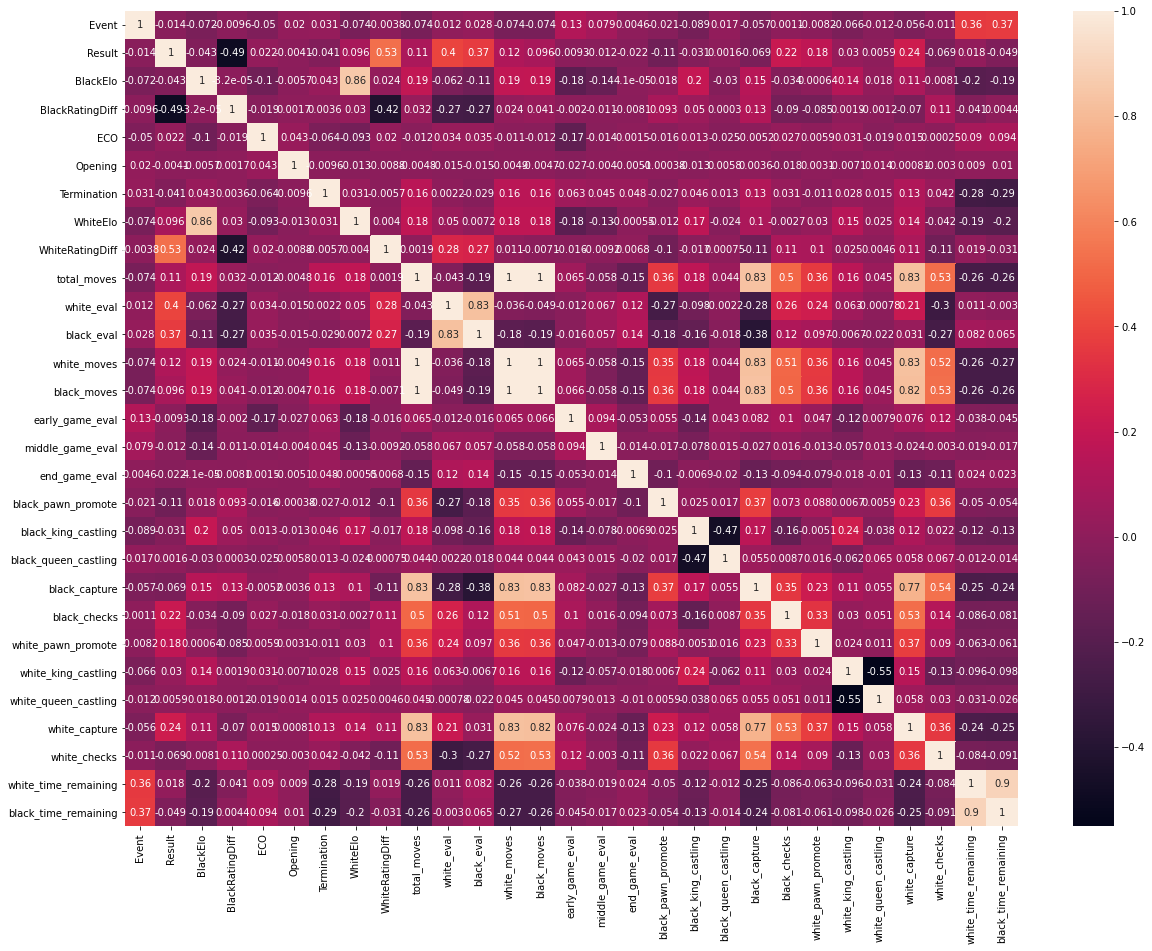

In [95]:
EventCorr = lc1.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(EventCorr, annot=True)
plt.show()

## Training

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm,metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


x = lc1[['white_time_remaining','ECO','early_game_eval','total_moves','Termination']]
y = lc1['Event']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

#Decision Tree 
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

#Random Forest
rf_cl = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
rf_train = rf_cl.fit(X_train,y_train)

#k-Neighbours
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

#XGB
model = XGBClassifier()
model.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Testing

In [97]:

predict = dec_tree.predict(X_test)
DT_Acc = metrics.accuracy_score(y_test,predict)
print("Decision Tree Accuracy: ",DT_Acc)

predict_rf = rf_cl.predict(X_test)
RF_Acc = metrics.accuracy_score(y_test,predict_rf)
print("Random Forest Accuracy: ",RF_Acc)

knn.predict(X_test)
KNN_Acc = knn.score(X_test, y_test)
print("k-Nearest Neighnours Accuracy: ",KNN_Acc)

y_pred = model.predict(X_test)
XGB_Acc = metrics.accuracy_score(y_test, y_pred)
print("XGB Accuracy: ",XGB_Acc)

Decision Tree Accuracy:  0.677006068779501
Random Forest Accuracy:  0.6535738368172623
k-Nearest Neighnours Accuracy:  0.7290964261631827
XGB Accuracy:  0.7783209710047202


# Elo Classification

## Functions

### Relevant Features

In [0]:
def get_relevant_features(df_old):
  df=df_old.copy()
  corrMatrix=df.corr()
  plt.subplots(figsize=(20,15))
  sn.heatmap(corrMatrix, annot=True)
  plt.show()

  cor=abs(corrMatrix['EloTarget'])
  relevant_features = cor[cor<0.6]
  relevant_features.sort_values(inplace=True)
  relevant_features.plot(kind='barh',figsize=(10,10))

  return list(relevant_features.index.values)

### Create Class of Elo

In [0]:
def generate_class_elo(df_old,player):
  df=df_old.copy()
  EloTarget = [0,1500,2000,4000]
  labels=[1,2,3]
  if(player=="white"):
    EloTarget = pd.cut(df['WhiteElo'], bins=EloTarget, labels=labels, include_lowest=True)
    df['EloTarget']=EloTarget
    df.drop(['WhiteElo'],axis=1,inplace=True)
  if(player=="black"):
    EloTarget = pd.cut(df['BlackElo'], bins=EloTarget, labels=labels, include_lowest=True)
    df['EloTarget']=EloTarget
    df.drop(['BlackElo'],axis=1,inplace=True)

  df.EloTarget=df.EloTarget.astype(int)

  return df

## White_All

### Training and Testing

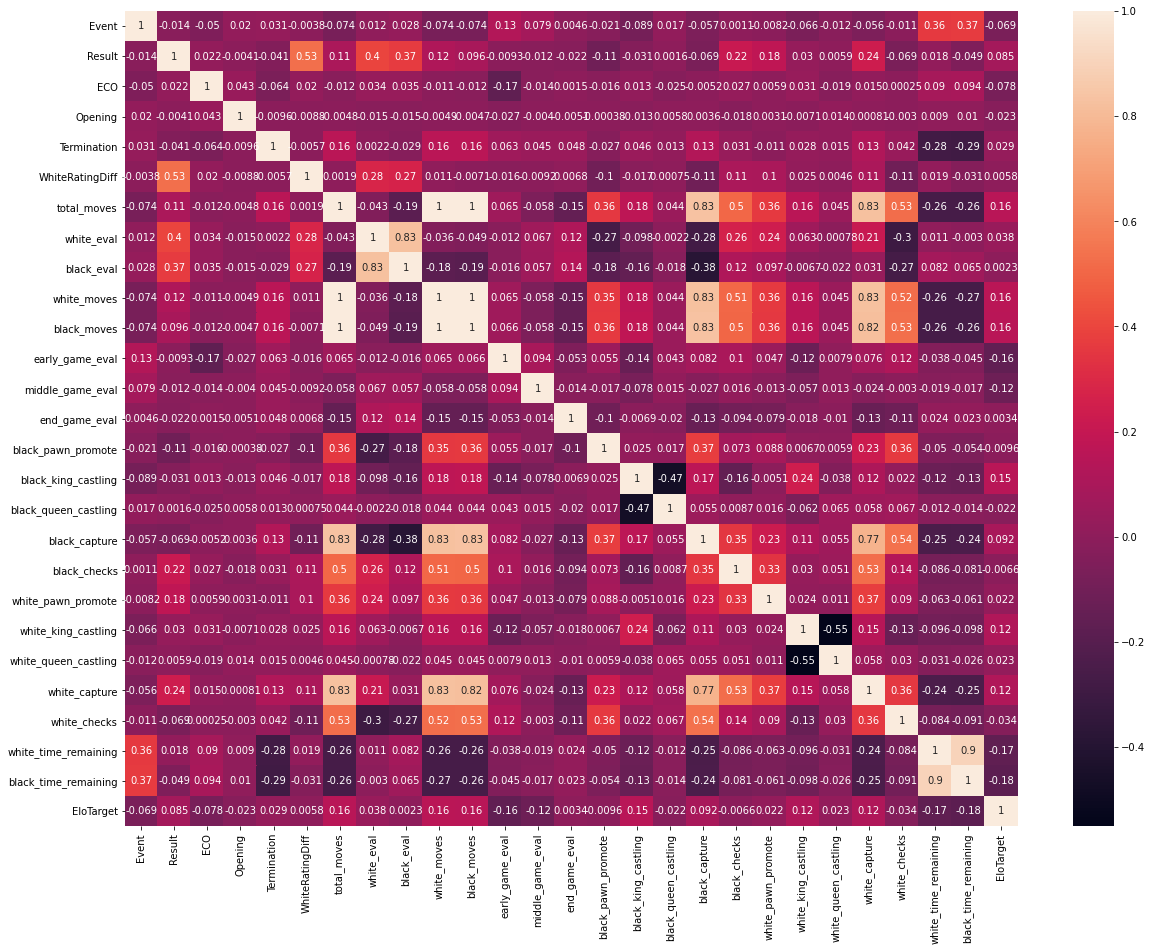

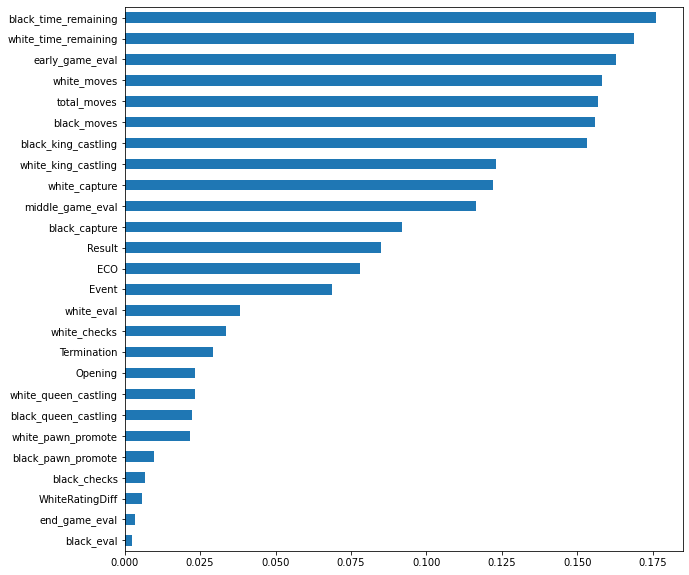

In [100]:
player='white'
df=generate_class_elo(white_df_all,player)
relevant_features=get_relevant_features(df)

In [0]:
x = df[relevant_features]
y = df['EloTarget']
X_train,  X_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Models

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm,metrics
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predict = logreg.predict(X_test)
metrics.accuracy_score(y_test,predict)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5890087660148348

In [103]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
predict = dec_tree.predict(X_test)
metrics.accuracy_score(y_test,predict)

0.5

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100,max_depth=2, random_state=0)
trained = rf_clf.fit(X_train, y_train)
predit_rf = rf_clf.predict(X_test)
print("Accuracy Score : ",metrics.accuracy_score(y_test,predit_rf))

Accuracy Score :  0.585974376264329


In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
predict=knn.predict(X_test)
knn.score(X_test, y_test)
metrics.accuracy_score(y_test,predict)

0.5195549561699259

In [106]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6375590020229265


## Black_All

### Training and Testing

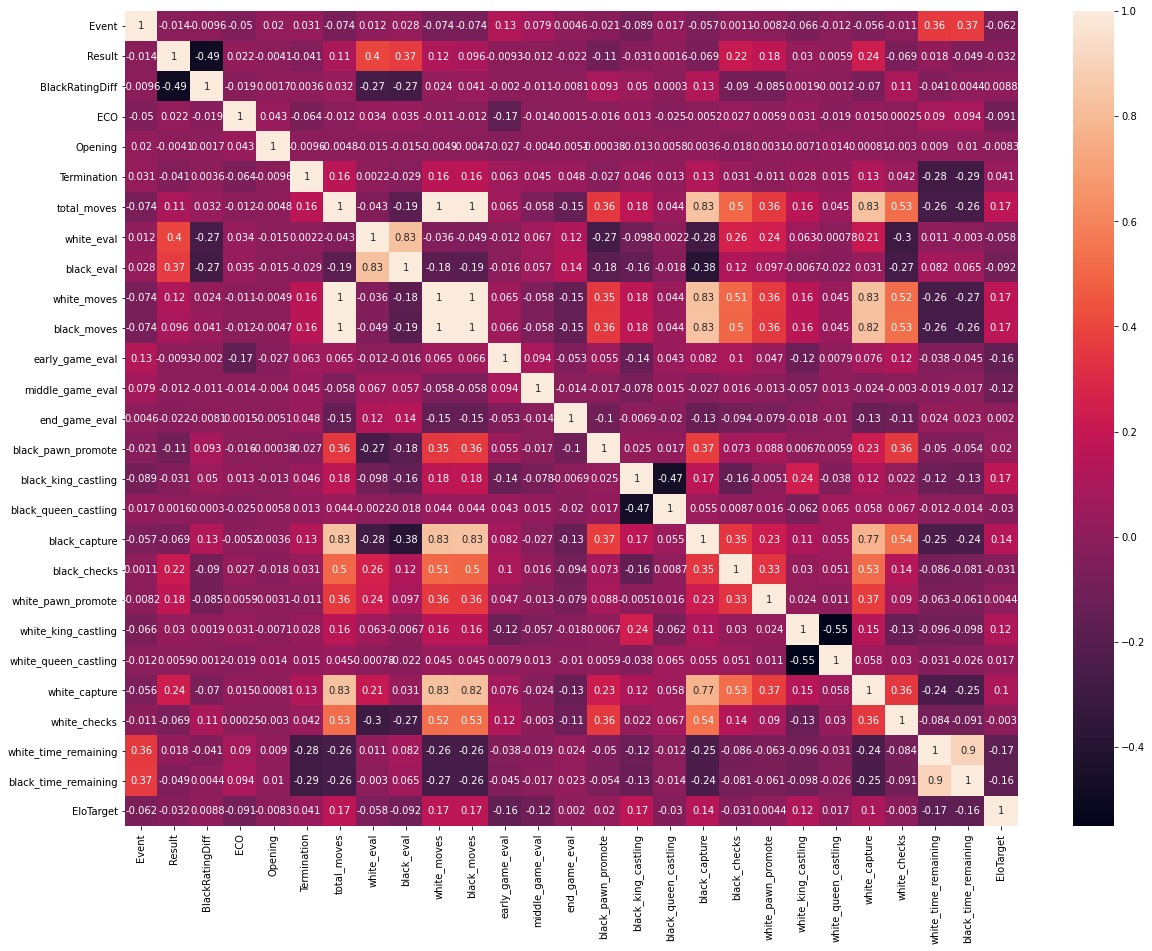

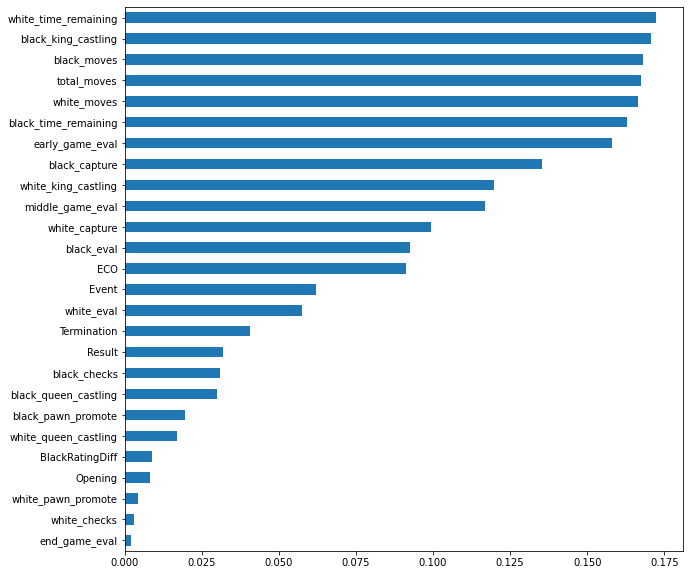

In [107]:
player='black'
df=generate_class_elo(black_df_all,player)
relevant_features=get_relevant_features(df)

In [0]:
x = df[relevant_features]
y = df['EloTarget']
X_train,  X_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Models

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm,metrics
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predict = logreg.predict(X_test)
metrics.accuracy_score(y_test,predict)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5971004720161834

In [110]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
predict = dec_tree.predict(X_test)
metrics.accuracy_score(y_test,predict)

0.5111260957518543

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100,max_depth=2, random_state=0)
trained = rf_clf.fit(X_train, y_train)
predit_rf = rf_clf.predict(X_test)
print("Accuracy Score : ",metrics.accuracy_score(y_test,predit_rf))

Accuracy Score :  0.585974376264329


In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
predict=knn.predict(X_test)
knn.score(X_test, y_test)
metrics.accuracy_score(y_test,predict)

0.5161834120026972

In [113]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6399190829399866


## White

### Training and Testing

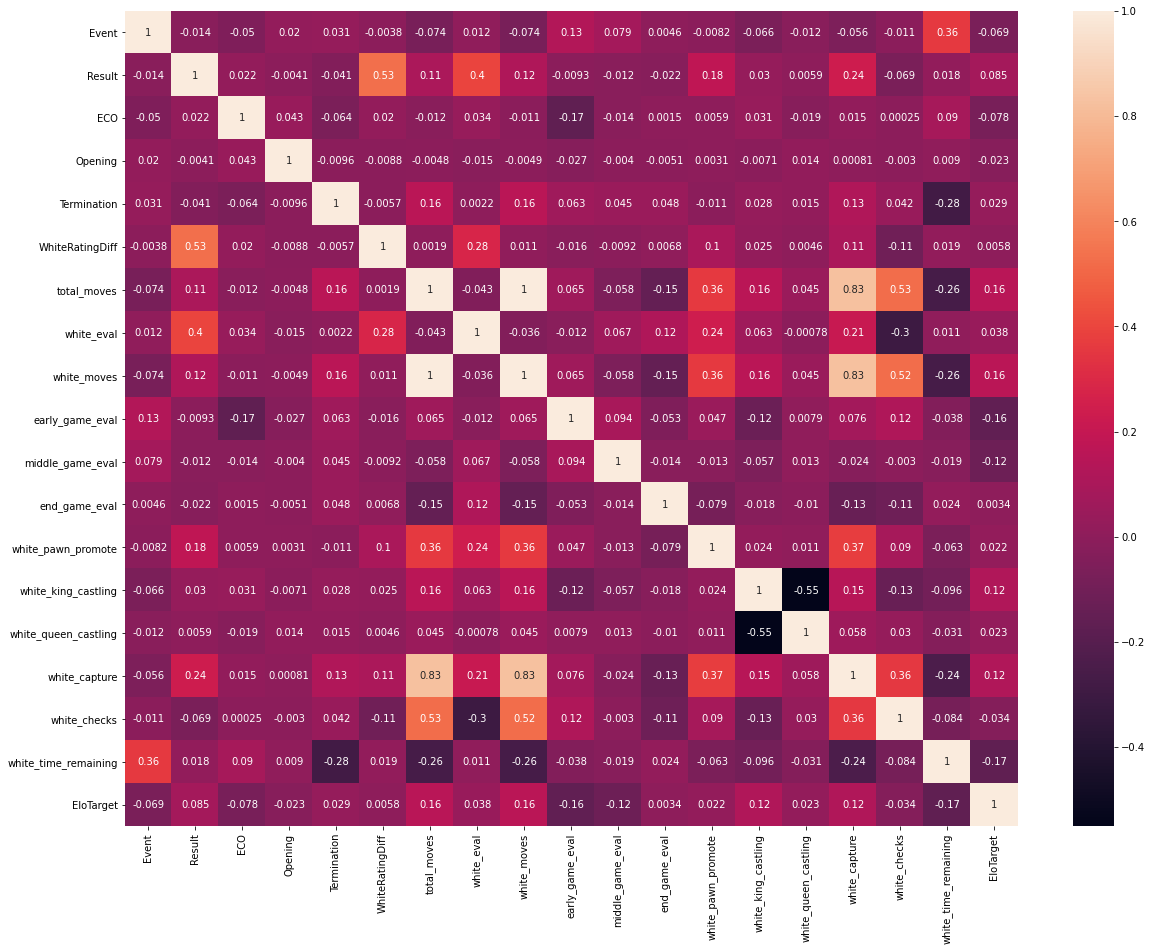

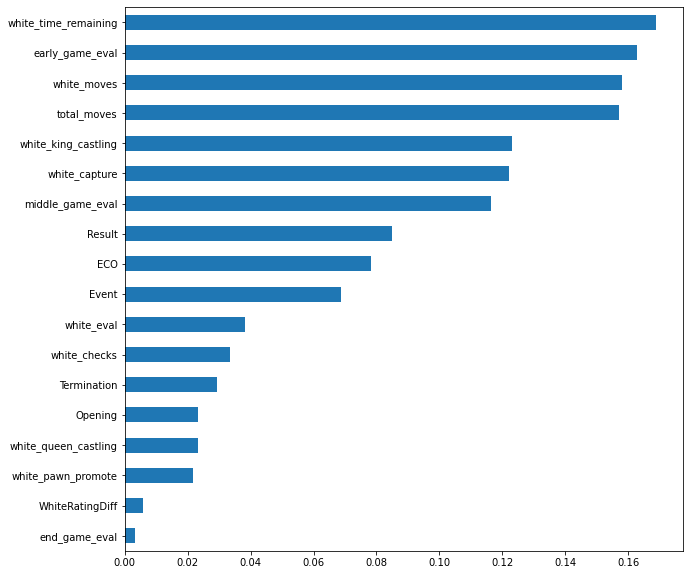

In [114]:
player='white'
df=generate_class_elo(white_df,player)
relevant_features=get_relevant_features(df)

In [0]:
x = df[relevant_features]
y = df['EloTarget']
X_train,  X_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Models

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm,metrics
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predict = logreg.predict(X_test)
metrics.accuracy_score(y_test,predict)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6030006743088334

In [117]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
predict = dec_tree.predict(X_test)
metrics.accuracy_score(y_test,predict)

0.5091031692515172

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100,max_depth=2, random_state=0)
trained = rf_clf.fit(X_train, y_train)
predit_rf = rf_clf.predict(X_test)
print("Accuracy Score : ",metrics.accuracy_score(y_test,predit_rf))

Accuracy Score :  0.5918745785569791


In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
predict=knn.predict(X_test)
knn.score(X_test, y_test)
metrics.accuracy_score(y_test,predict)

0.5150033715441672

In [120]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6431220498988537


## Black

### Training and Testing

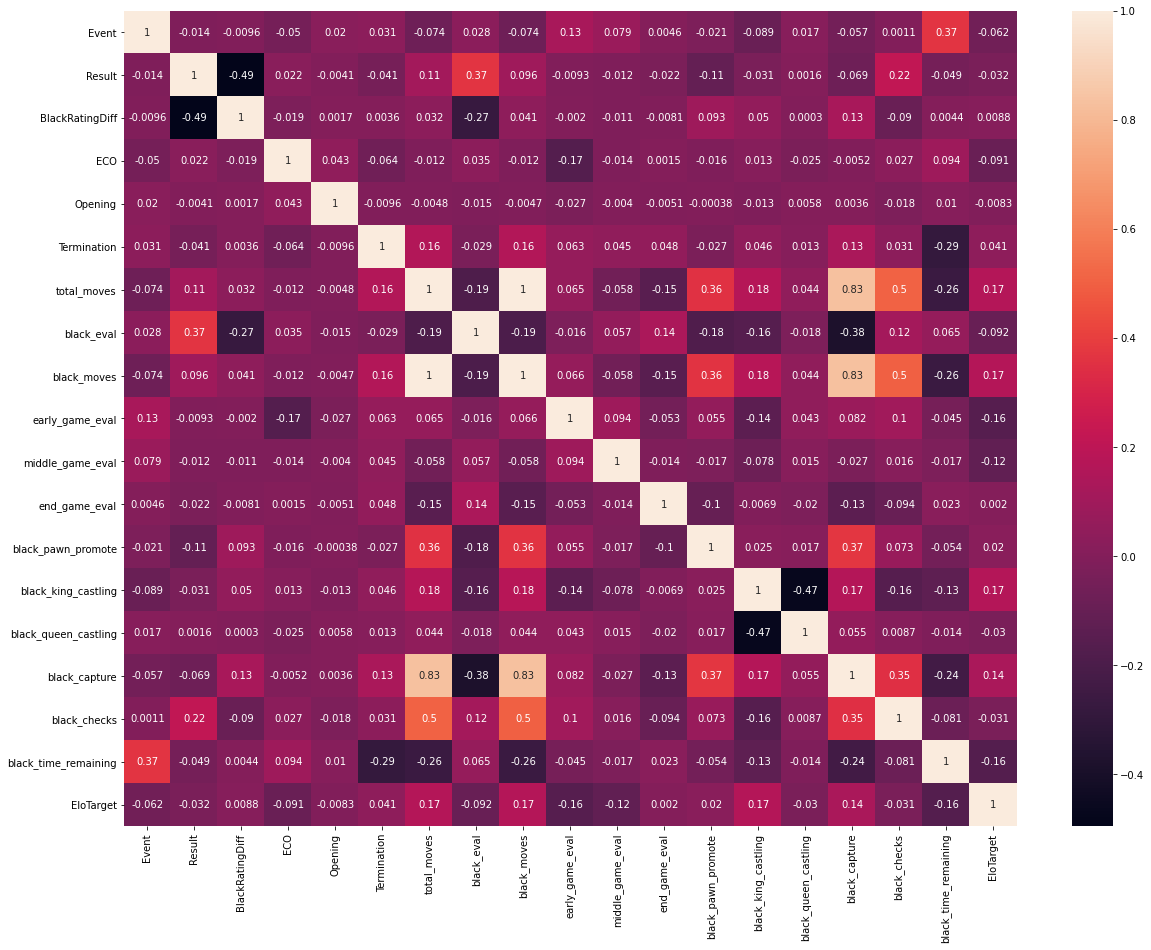

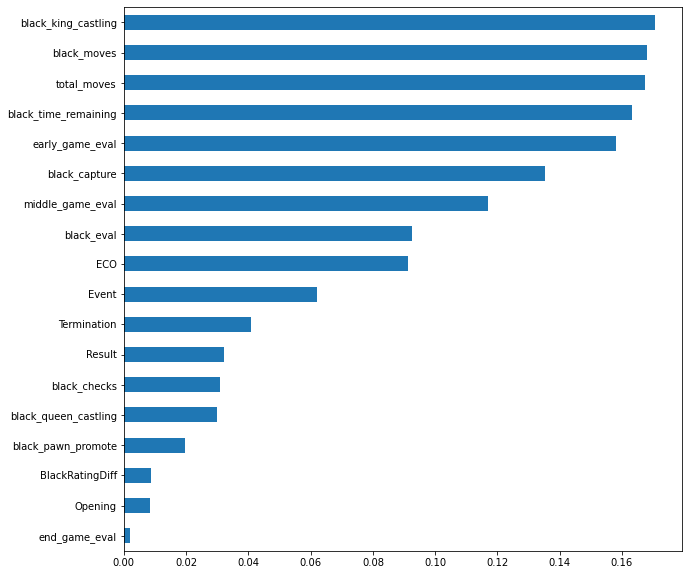

In [121]:
player='black'
df=generate_class_elo(black_df,player)
relevant_features=get_relevant_features(df)

In [0]:
x = df[relevant_features]
y = df['EloTarget']
X_train,  X_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Models

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm,metrics
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predict = logreg.predict(X_test)
metrics.accuracy_score(y_test,predict)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5905259608900877

In [124]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
predict = dec_tree.predict(X_test)
metrics.accuracy_score(y_test,predict)

0.5030343897505057

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100,max_depth=2, random_state=0)
trained = rf_clf.fit(X_train, y_train)
predit_rf = rf_clf.predict(X_test)
print("Accuracy Score : ",metrics.accuracy_score(y_test,predit_rf))

Accuracy Score :  0.5822656776803776


In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
predict=knn.predict(X_test)
knn.score(X_test, y_test)
metrics.accuracy_score(y_test,predict)

0.526298044504383

In [127]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6395819285232637


# Elo Regression

## Functions

### Relevant Features

In [0]:
def get_relevant_features(df,player):
  corrMatrix=df.corr()
  plt.subplots(figsize=(20,15))
  sn.heatmap(corrMatrix, annot=True)
  plt.show()
  
  if(player=="white"):
    cor=abs(corrMatrix['WhiteElo'])
  if(player=="black"):
    cor=abs(corrMatrix['BlackElo'])
  
  relevant_features = cor[cor<0.6]
  relevant_features.sort_values(inplace=True)
  relevant_features.plot(kind='barh',figsize=(10,10))

  return list(relevant_features.index.values)

## White_All

### Training and Testing

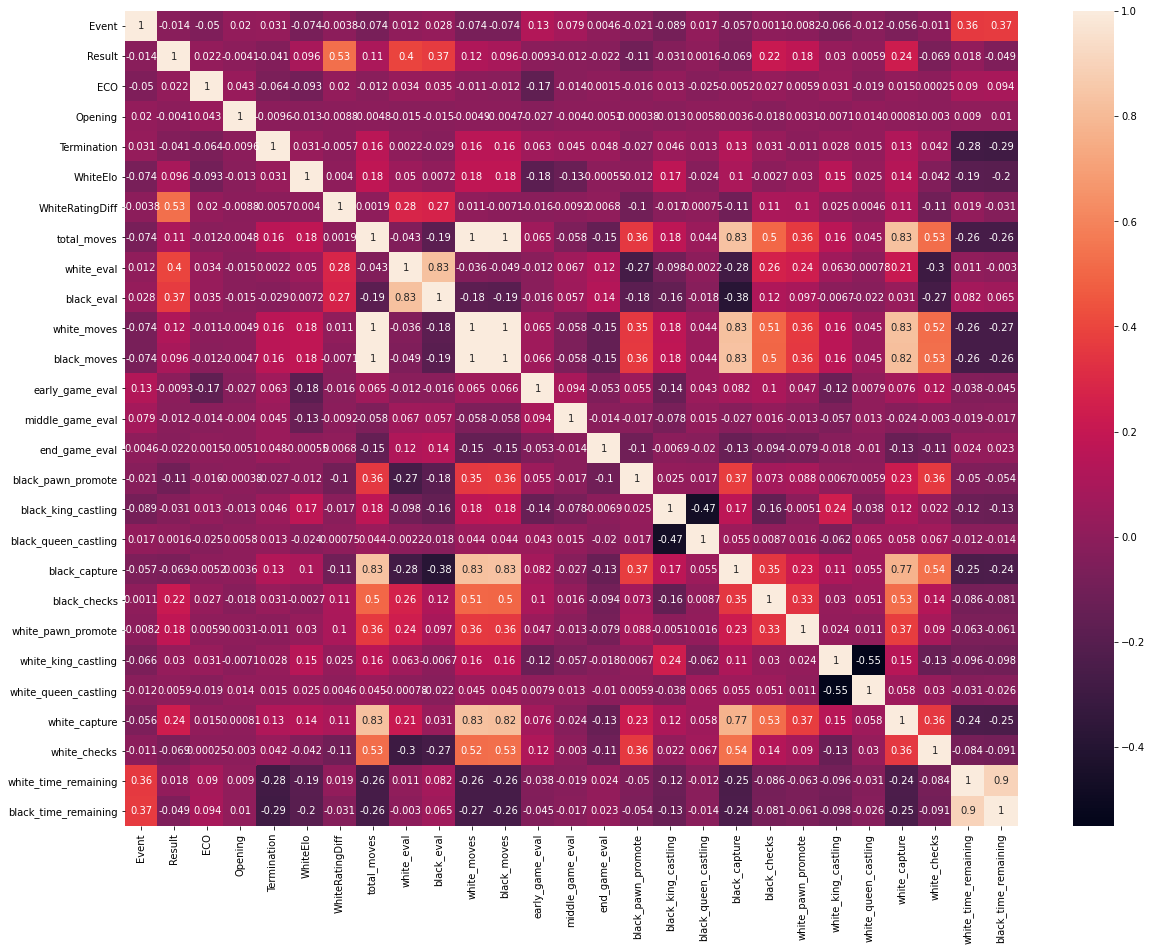

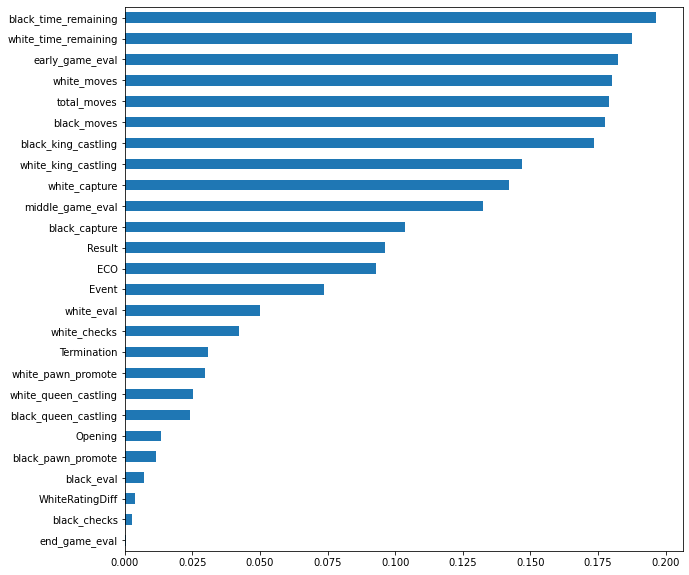

In [129]:
player='white'
relevant_features=get_relevant_features(white_df_all,player)

In [0]:
x = white_df_all[relevant_features]
y = white_df_all['WhiteElo']
X_train,  X_test,  Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

### Models

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 259.29804229755644


In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 271.66778588252146


In [133]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

Y_pred = neigh.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 314.57305164509586


## Black_All

### Training and Testing

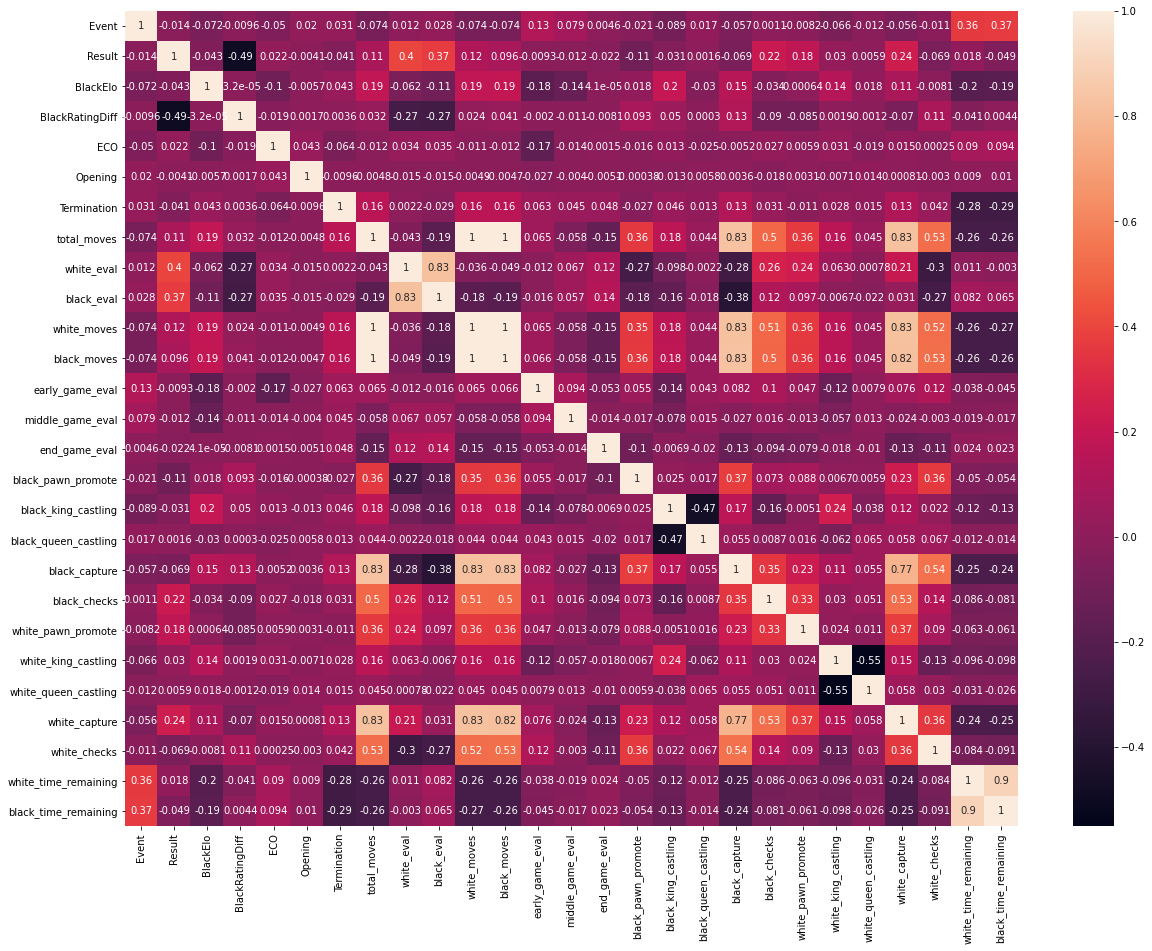

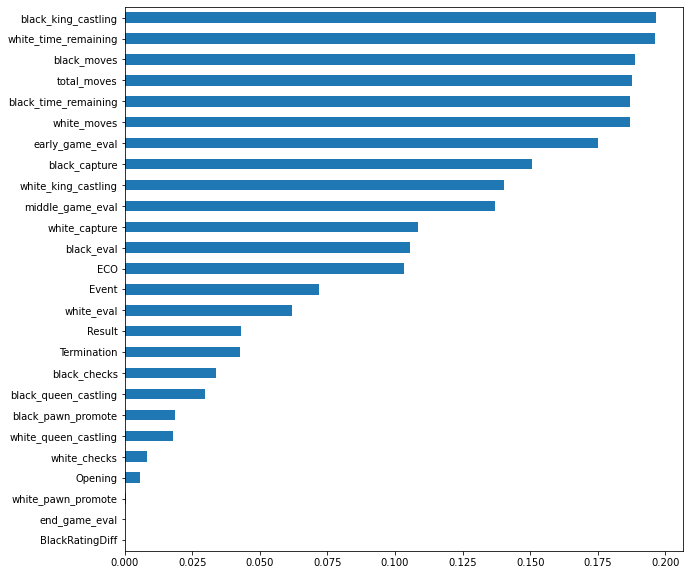

In [134]:
player='black'
relevant_features=get_relevant_features(black_df_all,player)

In [0]:
x = black_df_all[relevant_features]
y = black_df_all['BlackElo']
X_train,  X_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Models

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 286.4500522389936


In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 286.5046118144356


In [138]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

Y_pred = neigh.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 352.38653447796366


## White

### Training and Testing

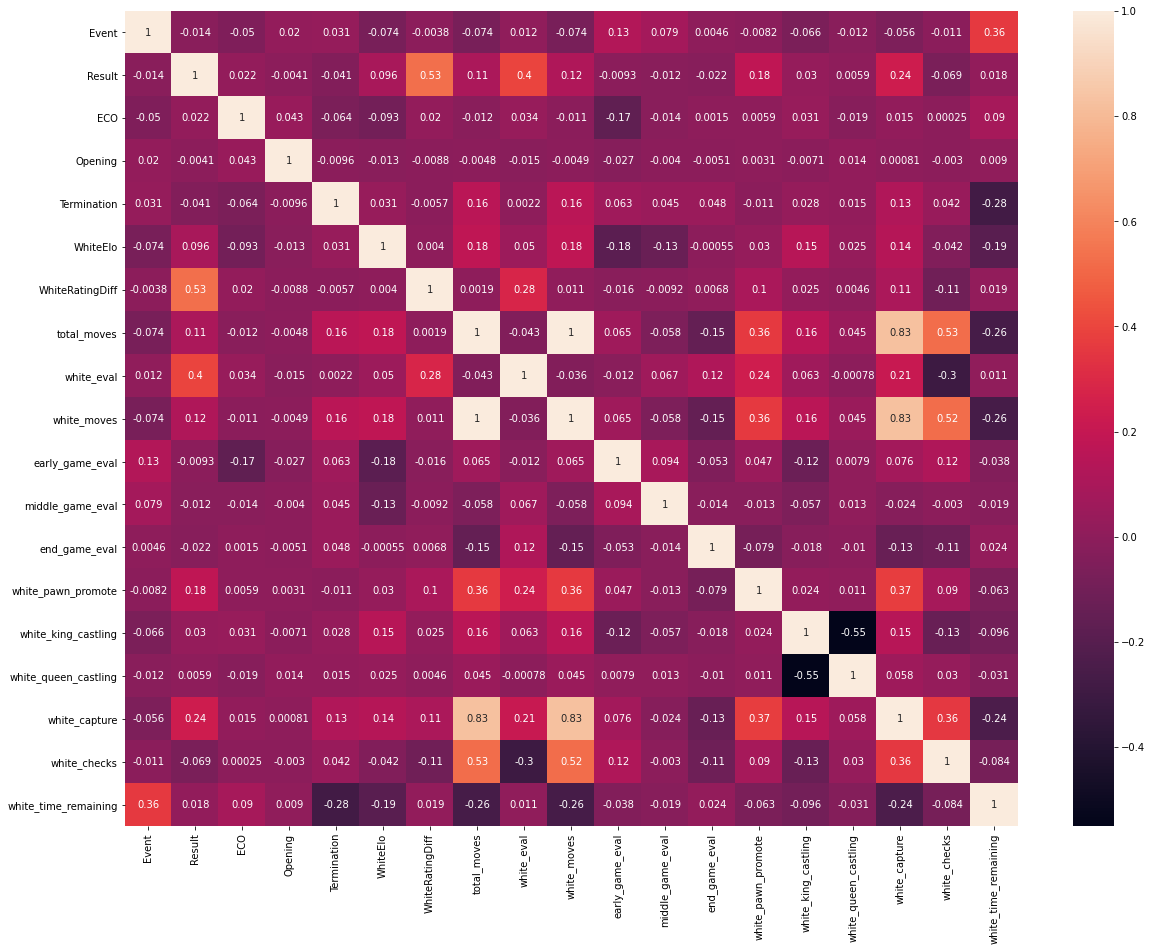

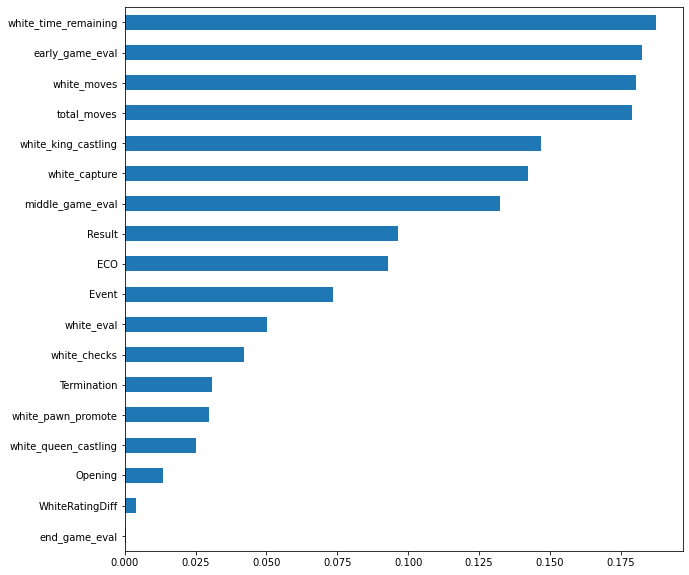

In [139]:
player='white'
relevant_features=get_relevant_features(white_df,player)

In [0]:
x = white_df[relevant_features]
y = white_df['WhiteElo']
X_train,  X_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Models

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 286.6611181131256


In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 286.58882596443493


In [143]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

Y_pred = neigh.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 348.60470064898016


## Black

### Training and Testing

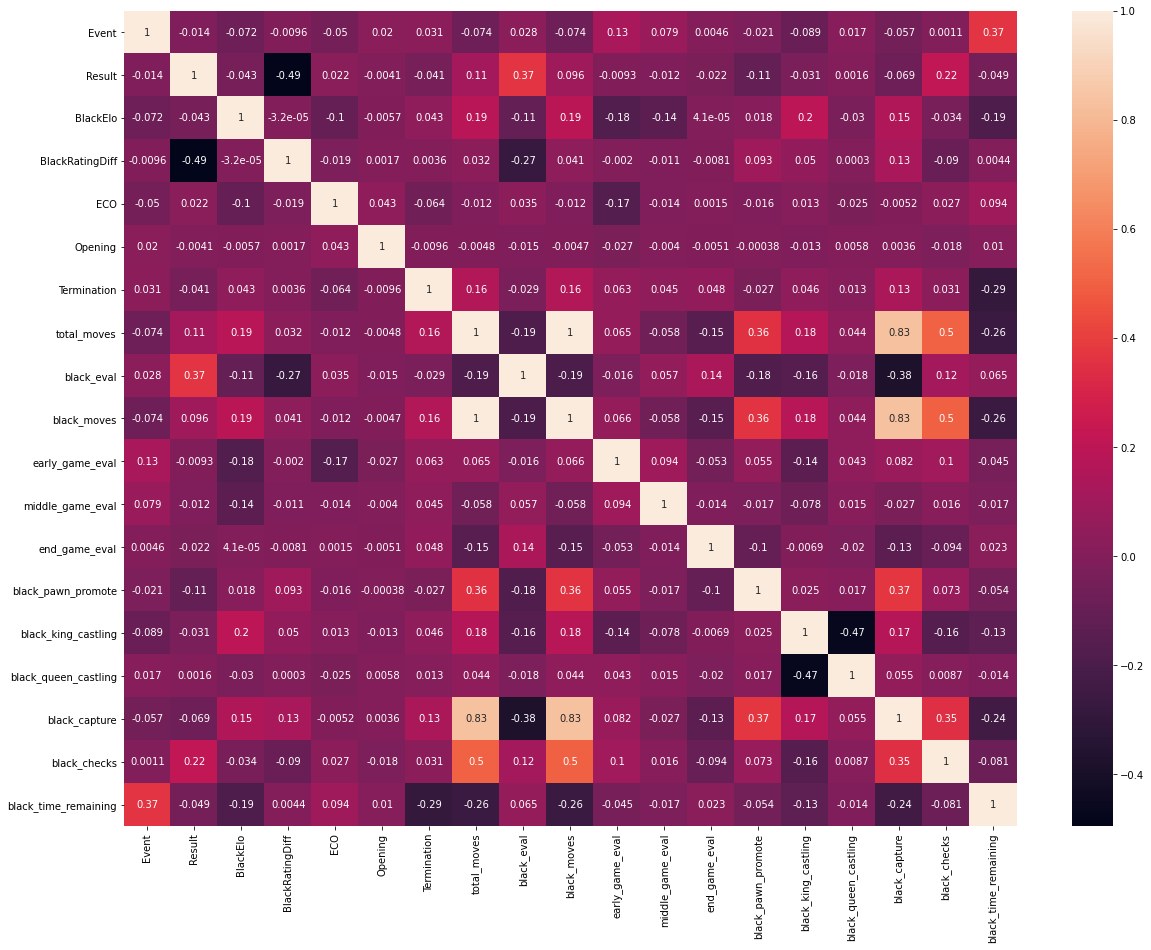

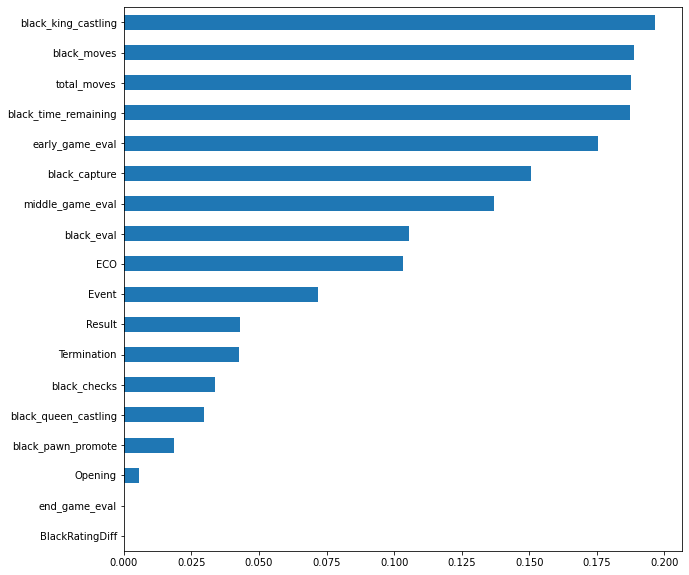

In [144]:
player='black'
relevant_features=get_relevant_features(black_df,player)

In [0]:
x = black_df[relevant_features]
y = black_df['BlackElo']
X_train,  X_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Models

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 286.43221558047753


In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 286.45700372958834


In [148]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

Y_pred = neigh.predict(X_test)

rms = np.sqrt(mean_squared_error((Y_test), (Y_pred)))
print('RMSE:', rms)

RMSE: 352.4311301402138
